In [5]:
from qiskit import *
from qiskit.quantum_info.operators import *
import numpy as np
%matplotlib inline

cir = QuantumCircuit(3, 3)
oracle = Operator([[1, 0, 0, 0, 0, 0, 0, 0], 
                   [0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0], 
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0], 
                   [0, 0, 0, 0, 0, 0, 0, 1]])

cir.h(0)
cir.h(1)
cir.h(2)

# 1st iteration
cir.append(oracle, [0, 1, 2])
cir.h(0)
cir.h(1)
cir.h(2)
cir.x(0)
cir.x(1)
cir.x(2)
cir.h(2)
cir.ccx(0, 1, 2)
cir.h(2)
cir.x(0)
cir.x(1)
cir.x(2)
cir.h(0)
cir.h(1)
cir.h(2)

cir.barrier([0, 1, 2])
cir.measure([0, 1, 2], [0, 1, 2])
cir.draw()

{'100': 2032, '111': 2090, '010': 2082, '001': 2068, '110': 2003, '011': 2062, '101': 1972, '000': 2075}


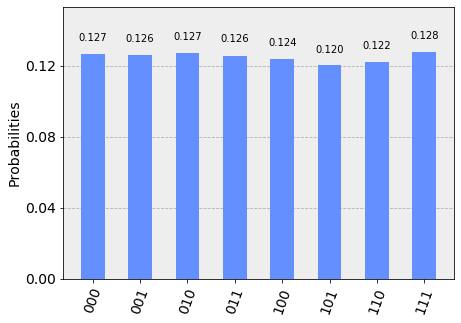

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(cir, backend, shots = 16384)
result = job.result()

counts = result.get_counts(cir)
print(counts)
visualization.plot_histogram(counts)